# Assigment 2

This assignment provides questions about the topic of **Estimates of Variability** from the book *Practical Statistics for Data Science*. These questions are designed to help the reader understand the theoretical and practical implementation of these concepts.

**Author:** [Molo Munyansanga](https://github.com/Molo-M)

Here is the data set to help you answer the questions:

In [1]:
import pandas as pd

data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
              'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
              'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa'],
    'Population': [4779736, 710231, 6392017, 2915918, 37253956,
                   5029196, 3574097, 897934, 18801310, 9687653,
                   1360301, 1567582, 12830632, 6483802, 3046355],
    'Murder.Rate': [5.7, 5.6, 4.7, 5.6, 4.4,
                    2.8, 2.4, 5.8, 5.2, 6.0,
                    1.8, 2.3, 5.5, 5.7, 1.9]
}

state = pd.DataFrame(data)


### 📘 **Questions**

#### Q1. Calculate the standard deviation of the population values using **three methods**:

* (a) Manually
* (b) With NumPy’s built-in standard deviation function (sample standard deviation, `ddof=1`).
* (c) Manually using the formula (no `.std()` or `np.std()`).



#### **Q2. Mean Absolute Deviation (MAD)**

Calculate the **mean absolute deviation from the mean** for the population.



#### **Q3. Median Absolute Deviation (MAD from median)**

Compute the **median absolute deviation from the median** for the population values.



#### **Q4. Interquartile Range (IQR)**

Find the **interquartile range** (75th percentile − 25th percentile) of the murder rates.



#### **Q5. Order Statistics**

What are the **minimum**, **25th percentile**, **median**, **75th percentile**, and **maximum** values of the population?



#### **Q6. Outlier Sensitivity**

Compare the **standard deviation** and the **MAD (from the median)**. Based on their values, which one is more **robust** to outliers in this dataset? Explain in 2–3 sentences.



#### **Q7. Bonus (Conceptual)**

Why might a data scientist prefer using **interquartile range (IQR)** over **standard deviation** when analyzing salary data?




# Answers:

Here is our data set:

In [2]:
state

,State,Population,Murder.Rate
0,Alabama,4779736,5.7
1,Alaska,710231,5.6
2,Arizona,6392017,4.7
3,Arkansas,2915918,5.6
4,California,37253956,4.4
5,Colorado,5029196,2.8
6,Connecticut,3574097,2.4
7,Delaware,897934,5.8
8,Florida,18801310,5.2
9,Georgia,9687653,6.0


### 1. Calculate the standard deviation of the population values using **three methods**:

* (a) Manually
* (b) With NumPy’s built-in standard deviation function (sample standard deviation, `ddof=1`).
* (c) Manually using the formula (no `.std()` or `np.std()`).




Here is the formula:

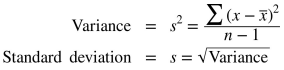

In [3]:
# Get n which is number of values or records
n = state.shape[0]

# Get the mean of the population (Check Quiz 1 to learn how to calculate mean)
mean = state['Population'].mean()

In [4]:
# Import libraries that will help to provide math functions
import math
import numpy as np

# Create variable to store the sum of (x - mean) squared:
tot_variance_sum = 0

# Create loop to go through every value (x)
for i in range(n):
    # print(state.iloc[i, 1])
    x_i = state.iloc[i, 1]
    x_m_squared = (x_i - mean) ** 2
    tot_variance_sum += x_m_squared

# Find variance:
variance = tot_variance_sum / (n - 1)

# Find standard deviation:
st_dv = math.sqrt(variance)

# Print out the results:
print(f"Manually calculated standard deviation: {st_dv}")
print(f"With NumPy’s built-in standard deviation function: {np.std(state['Population'], ddof=1)}")
print(f"With the formula 'no .std()': {state['Population'].std()}")

Manually calculated standard deviation: 9562908.124270894
With NumPy’s built-in standard deviation function: 9562908.124270894
With the formula 'no .std()': 9562908.124270894


### 2. Mean Absolute Deviation (MAD)

Calculate the **mean absolute deviation from the mean** for the population.


Here is the formula:

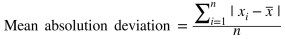

In [58]:
# Create variable to store sum for MAD
tot_mad = 0

# Loop through each Xi:
for i in range(n):
    x_i = state.iloc[i, 1]
    x_m = x_i - mean

    # Get absolute value:
    if x_m < 0:
        absolute_x_m = x_m * (-1)
    else:
        absolute_x_m = x_m

    # Add to total:
    tot_mad += absolute_x_m

# Get mean absolution deviation
mad = tot_mad / n

# Print out the results:
print(f"Manually calculated mean absolution deviation: {mad}")

Manually calculated mean absolution deviation: 6375825.644444445


### 3. Median Absolute Deviation (MAD from median)

Compute the **median absolute deviation from the median** for the population values.


Here is the formula:

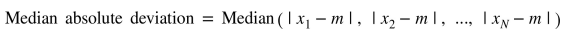

In [10]:
# Import library
import scipy

# Get median (Check out Quiz 1 to figure out how to calculate median)
median = state["Population"].median()

# Carry out absolute(x - median) on all rows to find the deviations:
med_state = abs(state["Population"] - median)

# Find the median absolute deviation:
median_abs_dev = med_state.median()

# Print out the results:
print(f"Manually calculated median absolute deviation: {median_abs_dev}")
print(f"Automatically calculated median absolute deviation: {scipy.stats.median_abs_deviation(state["Population"])}")

Manually calculated median absolute deviation: 3212154.0
Automatically calculated median absolute deviation: 3212154.0


### 4. Interquartile Range (IQR)

Find the **interquartile range** (75th percentile − 25th percentile) of the murder rates.

Steps to calculate the interquartile range:
- **Order the Data:** Arrange your dataset from the smallest to the largest value. 
- **Find the Median (Q2):** The median is the middle value of the sorted data. If you have an even number of data points, the median is the average of the two middle values. 
- **Find the Lower Quartile (Q1):** Q1 is the median of the lower half of the data (excluding the overall median). 
- **Find the Upper Quartile (Q3):** Q3 is the median of the upper half of the data (excluding the overall median). 
- **Calculate the IQR:** IQR = Q3 - Q1. 

In [39]:
# Sort the population values
state_sorted = state["Population"].sort_values(ignore_index=True)

# Since we have an odd number of data points (n=15), we will have our midpoint on the middle value.
midpoint = n / 2

# Remember to convert them to integer
left_midpoint = int(midpoint - 1.5)
right_midpoint = int(midpoint + 0.5)

# Calculate Q1 and Q3
Q1 = state_sorted[0:left_midpoint].median()
Q3 = state_sorted[right_midpoint:].median()

# Find Interquartile Range (IQR)
IQR = Q3 - Q1

# Print out the results:
print(f"Manually calculated Interquartile Range Q3 - Q2 ({Q3} - {Q1}) = {IQR}")
print(f"Automatically calculated Interquartile Range (IQR): {scipy.stats.iqr(state_sorted)}")


Manually calculated Interquartile Range Q3 - Q2 (9687653.0 - 1463941.5) = 8223711.5
Automatically calculated Interquartile Range (IQR): 5843977.5


**NOTE:** The manually calculated IQR is different from the automatically calculated IQR because we used **median** to calculate 25th(Q1) and 75th(Q2) percentiles while scipy.stats uses **interpolation**.

### 🔍 What Is Interpolation?

**Interpolation** means estimating a value **between two known values**.

In the context of percentiles, interpolation is used when the exact percentile (like the 25th or 75th) **does not fall exactly on a data point**, because the data set is too small or the percentile lands between two values.

---

### 🧪 Simple Example (With Interpolation)

Suppose you have the sorted data:

```python
data = [1, 3, 5, 7]
```

There are 4 numbers.

* The **25th percentile** would fall at **position**:

  $$
  p = 25\% \times (n - 1) = 0.25 \times 3 = 0.75
  $$

  That means it lies **three-quarters of the way between the first and second element** (between 1 and 3).

Using **linear interpolation**:

$$
\text{25th percentile} = 1 + 0.75 \times (3 - 1) = 1 + 0.75 \times 2 = 1 + 1.5 = 2.5
$$

> ⚠️ Even though there is no "2.5" in the data, the 25th percentile is estimated to be **2.5**.

---

### 🔢 Compared to Classical Method

In the **classical method**, you'd just look at the lower half of the data `[1, 3]` and say the median of that is `2.0` (or choose the middle value if it’s odd).

> So **interpolation gives you more precise percentile estimates**—especially useful for **larger datasets** or **continuous variables**.

---

### 💡 Summary

| Term           | Meaning                                                                   |
| -------------- | ------------------------------------------------------------------------- |
| Interpolation  | Estimating a value *between* two data points                              |
| In percentiles | Used when the desired percentile index doesn’t exactly match a data point |



### 5. Order Statistics

What are the **minimum**, **25th percentile**, **median**, **75th percentile**, and **maximum** values of the population?


In [55]:
manual_statistics = {
    "Manually (with Median)": [state_sorted.min(), Q1, median, Q3, state_sorted.max()],
    "Automatically (with Interpolation)": [state_sorted.min(), np.percentile(state_sorted, [25])[0], median, np.percentile(state_sorted, [75])[0], state_sorted.max()]
}

order_stat_df = pd.DataFrame(manual_statistics, index=["minimum", "25th percentile", "median", "75th percentile", "maximum"])
order_stat_df

,Manually (with Median),Automatically (with Interpolation)
minimum,710231.0,710231.0
25th percentile,1463941.5,2241750.0
median,4779736.0,4779736.0
75th percentile,9687653.0,8085727.5
maximum,37253956.0,37253956.0


### 6. Outlier Sensitivity

Compare the **standard deviation** and the **MAD (from the median)**. Based on their values, which one is more **robust** to outliers in this dataset? Explain in 2–3 sentences.

In [57]:
print(f"Standard deviation: {st_dv} \nMAD (from the median): {median_abs_dev}")

Standard deviation: 9562908.124270894 
MAD (from the median): 3212154.0


**Answer:** The MAD is more robust is more robust to outliers. This is because of calculation of the variance where values are squared. Outliers are more sensitive to being squared.

### 7. Bonus (Conceptual)

Why might a data scientist prefer using **interquartile range (IQR)** over **standard deviation** when analyzing salary data?


**Answer:** They might prefer using IQR because it is less sensitive to outliers. This is due to picking only between the 25th and 75th percentiles. The outliers on the ends of the data point are ignored during this process.